In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def merge_DataFrames(df1, df2, df3):

    final_df = pd.DataFrame()

    final_df['LinearSVC_DSC'] = df1['Dice_coefficient']
    final_df['SVC_DSC'] = df2['Dice_coefficient']
    final_df['RF_DSC'] = df3['Dice_coefficient']

    return final_df

In [3]:
RF_path = f'../../../Results/Best_Models/RF_Results/results.csv'
SVC_path = f'../../../Results/Best_Models/SVC_Results/results.csv'
LinearSVC_path = f'../../../Results/Best_Models/LinearSVC_Results/results.csv'

In [4]:
RF_df = pd.read_csv(RF_path)
SVC_df = pd.read_csv(SVC_path)
LinearSVC_df = pd.read_csv(LinearSVC_path)

In [5]:
df = merge_DataFrames(LinearSVC_df, SVC_df, RF_df)

0.8476675586039291 	 0.03744235762421851
0.849635981 	 0.05501470799309009
0.8266538257993193 	 0.06658483257130764


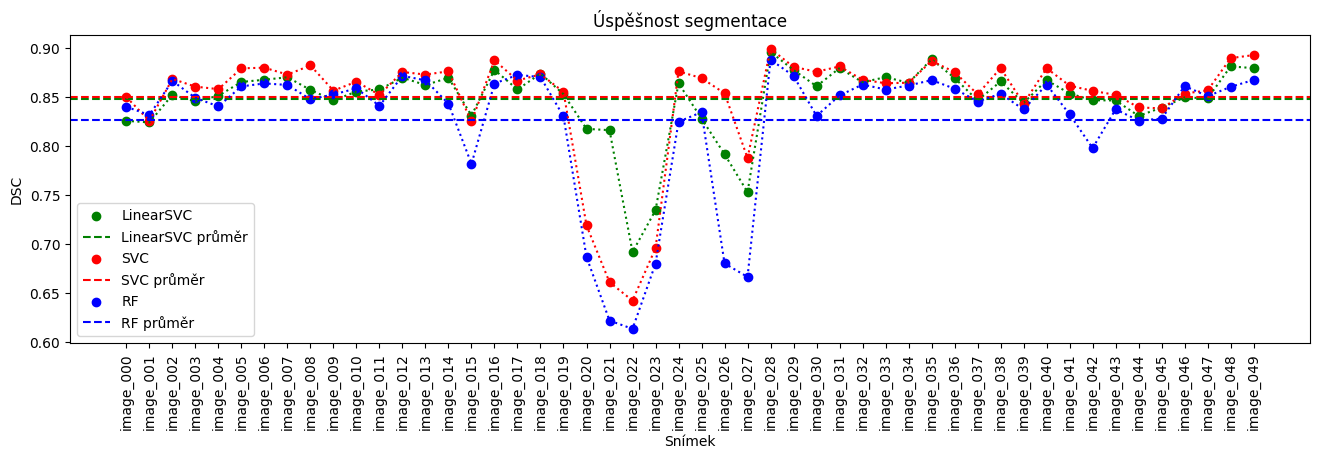

In [6]:
col_names = list(df.columns)
colors = ['g', 'r', 'b']
names = [f'image_{i:03}' for i in range(df.shape[0])]
x = [i for i in range(df.shape[0])]

plt.figure(figsize=(16,4))

for i, (column,color) in enumerate(zip(col_names, colors)):
    plt.plot(x, df[column], color=color, linestyle=':')
    plt.scatter(x, df[column], marker='o', color=color, label=column[:-4])

    plt.axhline(y=df[column].mean(), color=color, linestyle='--', label=f'{column[:-4]} průměr')

    print(df[column].mean(), '\t', df[column].std())

# Settings
plt.title('Úspěšnost segmentace')
plt.xlabel('Snímek')
plt.ylabel('DSC')
plt.legend(loc='best')
plt.xticks(x, labels=names)
plt.tick_params(axis='x', rotation=90)
plt.show()

In [7]:
index_min = df['LinearSVC_DSC'].idxmin()

index_max = df['LinearSVC_DSC'].idxmax()

print("Index minimální hodnoty:", index_min, "Hodnota DSC:", df.at[index_min, 'LinearSVC_DSC'])
print("Index maximální hodnoty:", index_max, "Hodnota DSC:", df.at[index_max, 'LinearSVC_DSC'])


Index minimální hodnoty: 22 Hodnota DSC: 0.6915642005746809
Index maximální hodnoty: 28 Hodnota DSC: 0.8960654802298947


In [8]:
mean_value = df['LinearSVC_DSC'].mean()

df['LinearSVC_DSC_deviation'] = abs(df['LinearSVC_DSC'] - mean_value)

index_min_dev = df['LinearSVC_DSC_deviation'].idxmin()

print("Index minimální odchylky:", index_min_dev, "Hodnota DSC:", df.at[index_min_dev, 'LinearSVC_DSC'])

Index minimální odchylky: 42 Hodnota DSC: 0.846741028839999
